In [4]:
from IPython.display import HTML
HTML('''<style>html, body{overflow-y: visible !important} .CodeMirror{min-width:105% !important;} .rise-enabled .CodeMirror, .rise-enabled .output_subarea{font-size:140%; line-height:1.2; overflow: visible;} .output_subarea pre{width:110%}</style>''') # For slides

# Foundations of Data Mining: Assignment 1

Please complete all assignments in this notebook. You should submit this notebook, as well as a PDF version (See File > Download as).

In [2]:
# Please fill in your names here
NAME_STUDENT_1 = ""
NAME_STUDENT_2 = ""

In [5]:
%matplotlib inline
from preamble import *
plt.rcParams['savefig.dpi'] = 100 # This controls the size of your figures
# Comment out and restart notebook if you only want the last output of each cell.
InteractiveShell.ast_node_interactivity = "all"

## MoneyBall (5 points, 1+2+1+1)
In the early 2000s, 2 baseball scouts completely changed the game of baseball by analysing the available data about baseball players and hiring the best ones.
The [MoneyBall dataset](https://www.openml.org/d/41021) contains this data (click the link for more details). The goal is to accurately predict the number of 'runs' each player can score. 

In [4]:
moneyball = oml.datasets.get_dataset(41021) # Download MoneyBall data
# Get the predictors X and the target y
X, y, attribute_names = moneyball.get_data(target=moneyball.default_target_attribute, return_attribute_names=True)
# Describe the data with pandas, just to get an overview
ballframe = pd.DataFrame(X, columns=attribute_names)
ballframe.describe()

,Team,League,Year,RA,...,RankPlayoffs,G,OOBP,OSLG
count,1232.00,1232.0,1232.00,1232.00,...,244.00,1232.00,420.00,420.00
mean,15.67,0.5,1988.96,715.08,...,1.72,3.92,0.33,0.42
std,9.72,0.5,14.82,93.08,...,1.10,0.62,0.02,0.03
min,0.00,0.0,1962.00,472.00,...,0.00,0.00,0.29,0.35
25%,7.00,0.0,1976.75,649.75,...,1.00,4.00,0.32,0.40
50%,16.00,0.5,1989.00,709.00,...,2.00,4.00,0.33,0.42
75%,23.00,1.0,2002.00,774.25,...,3.00,4.00,0.34,0.44
max,38.00,1.0,2012.00,1103.00,...,4.00,7.00,0.38,0.50


1 . Visually explore the data. Plot the distribution of each feature (e.g. histograms), as well as the target. Visualize the dependency of the target on each feature (use a 2d scatter plot). Is there anything that stands out? Is there something that you think might require special treatment?
- Feel free to create additional plots that help you understand the data
- Only visualize the data, you don't need to change it (yet)

2 . Compare all linear regression algorithms that we covered in class (Linear Regression, Ridge, Lasso and ElasticNet), as well as kNN. Evaluate using cross-validation and the $R^2$ score, with the default parameters. Does scaling the data with StandardScaler help? Provide a concise but meaningful interpretation of the results.
- Preprocess the data as needed (e.g. are there nominal features that are not ordinal?). If you don't know how to proceed, remove the feature and continue.

3 . Do a default, shuffled train-test split and optimize the linear models for the degree of regularization ($alpha$) and choice of penalty (L1/L2). For Ridge and  Lasso, plot a curve showing the effect of the training and test set performance ($R^2$) while increasing the degree of regularization for different penalties. For ElasticNet, plot a heatmap $alpha \times l1\_ratio \rightarrow R^2$ using test set performance.
Report the optimal performance. Again, provide a concise but meaningful interpretation. What does the regularization do? Can you get better results?
- Think about how you get the L1/L2 loss. This is not a hyperparameter in regression.
- We've seen how to generate such heatmaps in Lecture 3.

4 . Visualize the coefficients of the optimized models. Do they agree on which features are
important? Compare the results with the feature importances returned by a RandomForest. Does it agree with the linear models? What would look for when scouting for a baseball player?

## Nepalese character recognition (5 points, 1+2+2)
The [Devnagari-Script dataset](https://www.openml.org/d/40923) contains 92,000 images (32x32 pixels) of 46 characters from Devanagari script. Your goal is to learn to recognize the right letter given the image.

In [6]:
devnagari = oml.datasets.get_dataset(40923) # Download Devnagari data
# Get the predictors X and the labels y
X, y = devnagari.get_data(target=devnagari.default_target_attribute); 
# classes = devnagari.retrieve_class_labels(target_name='character') # This one takes a while, skip if not needed

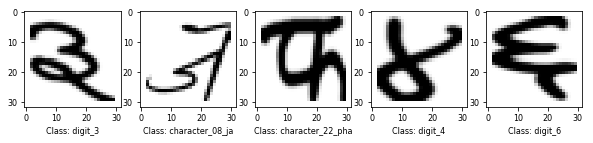

In [5]:
from random import randint
# Take some random examples, reshape to a 32x32 image and plot
fig, axes = plt.subplots(1, 5,  figsize=(10, 5))
for i in range(5):
    n = randint(0,90000)
    axes[i].imshow(X[n].reshape(32, 32), cmap=plt.cm.gray_r)
    axes[i].set_xlabel("Class: %s" % (classes[y[n]]))
plt.show();

1. Evaluate k-Nearest Neighbors, Logistic Regression and RandomForests with their default settings.
    - Take a stratified 10% subsample of the data.
    - Use the default train-test split and predictive accuracy. Is predictive accuracy a good scoring measure for this problem?
    - Try to build the same models on increasingly large samples of the dataset (e.g. 10%, 20%,...). Plot the training time and the predictive performance for each. Stop when the training time becomes prohibitively large (this will be different for different models). 

In [ ]:
'''
# Different method, stratifies and sets test and train size to appropriate level
# if I run all, lines below until "from sklearn" should not be necessary
devnagari = oml.datasets.get_dataset(40923) # Download Devnagari data
# Get the predictors X and the labels y
X, y = devnagari.get_data(target=devnagari.default_target_attribute); 
classes = devnagari.retrieve_class_labels(target_name='character') # This one takes a while, skip if not needed
'''
'''
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, train_size=0.1, random_state=2) 
# train_size=0.2, 0.3 etc. later on / random state included for reproducability
# Also, include here creation of validation variables, or in the next question 

# predictive accuracy: scores as output on the test data. 
# Scores on training data are given to see how well the 10% split actually predicts.
'''
'''
#KNN analysis 
from sklearn.neighbors import KNeighborsClassifier #use knn
knn = KNeighborsClassifier(n_neighbors=5, n_jobs=-1)# k is set to five, the default setting
knn.fit(X_train, y_train)# trains the data, additionally, something needs to record the training time
knn.score(X_train, y_train) # shows how well the knn model fits the trained data
knn.score(X_test, y_test) #calculates the score, prediction accuracy measure
#output should contain training time
'''
'''
#Logistic regression: multiclass, one versus all is the default case
from sklearn.linear_model import LogisticRegression #load logistic regression
# use logistic regression on data
logreg = LogisticRegression(n_jobs=-1).fit(X_train, y_train) 
#logreg is now training data using logistic regression, multiclass case is default

logreg.score(X_train, y_train) #gives score on fitting training data, something needs to record training time
logreg.score(X_test, y_test) # gives score on fitting test data, at 10% subsample, chances of correct prediction = 50%
'''
'''
#Random forest
from sklearn.ensemble import RandomForestClassifier  
forest = RandomForestClassifier(n_estimators=10, n_jobs=-1, random_state=2) #() r_s is constant, n_est is at default 
forest.fit(X_train, y_train)
forest.score(X_train, y_train)
forest.score(X_test, y_test)
'''
'''
Answer on in-between question:
Predictive accuracy is a measure which is dependent on the balance of the data. 
If a class is heavily underrepresented, in data and sample alike, 
missing this class consistently by the model will not affect the score.
This dataset however is very balanced, as there is a distribution of 2000 examples per class.
Therefore, it is possible to say that predictive accuracy is a good measure for this problem.
What is noticeable is the poor results for logitic regression and random forest on small samples of data, 
while it almost perfectly scores the training data. These methods of analyses therefor tend to overfit the training data.
KNN scores in comparison worse on scores on the 'train set', but shows good predictive accuracy at low sample size.
KNN at default settings run slow analyses, and seems to underfit at low samples. 
At 20% sample size, runtime was 15 minutes, predictive accuracy was 83%
Therefore, KNN at default settings, using a 20% sample size, outperforms Random Forests using 90% sample size.
logistic regression runs slow analyses, and seems to overfit training data, scores horrible (50/50 chance correct) 
Logistic regression
Random Forest runs the quickest analyses by far, but overfits the training data, especially at lower sample ranges.
Random Forest at default settings seems to label only 80% of new data correctly, 
but requires 90% of the data to achieve this. 
'''

# The following arrays represent the training time and accuracy per sample size.
# The values are entered manually, after analysis. This is done manually to control training time.
# N.B. Subsample size: 0.1, 0.2 , 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.99. 
training_time_knn = [0, 7, 15] # makes it a list
training_time_logistic = [0, 9.5]
training_time_forest = [0, 0.05, 0.05, 0.05, 0.08, 0.08, 0.08, 0.1, 0.1, 0.12, 0.12]
predictive_performance_knn = [0, 0.775, 0.831]
predictive_performance_logistic = [0, 0.459]
predictive_performanace_forest = [0, 0.597, 0.673, 0.708, 0.734, 0.751, 0.765, 0.778, 0.785, 0.79, 0.78]

# method: create empty arrays with scores and training time, fill arrays manually
# import panda on graphs, collect training time, collect appropriate data 

# plot creates three seperate plots as below, uncomment
# plt.plot(training_time_knn, predictive_performance_knn)
# plt.plot(training_time_logistic, predictive_performance_logistic)
 plt.plot(traning_time_forest, predictive_performance_forest)
#2.3 
'''
# nested crossval, random search possible values (n_estimator can be infinitely large, max_features = 1025, too large
from sklearn.model_selection import cross_val_score# probably ditch
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
# calcs
random_estimator= #to be filled in the n_estimator parameter (manually?)
forest = RandomForestClassifier(n_estimators=estimator[], n_jobs=-1, random_state=2)

# plot the combination scores on heatmap, x-axis = estimators; y-axis = max features
mglearn.tools.heatmap(scores, xlabel='n_estimators', xticklabels=param_grid['n_estimators'],
                      ylabel='max_features', yticklabels=param_grid['max_features'], cmap="viridis");
'''

The world is not flat


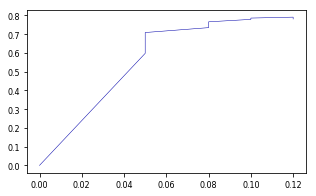

In [6]:
print("The world is not flat")
training_time_forest = [0, 0.05, 0.05, 0.05, 0.08, 0.08, 0.08, 0.1, 0.1, 0.12, 0.12]
predictive_performance_forest = [0, 0.597, 0.673, 0.708, 0.734, 0.751, 0.765, 0.778, 0.785, 0.79, 0.78]
plt.plot(training_time_forest, predictive_performance_forest)

2 . Optimize the value for the number of neighbors $k$ (keep $k$ < 50) and the number of trees (keep $n\_estimators$ < 100) on the stratified 10% subsample.
- Use 10-fold crossvalidation and plot $k$ and $n\_estimators$ against the predictive accuracy. Which value of $k$, $n\_estimators$ should you pick?

In [13]:
'''devnagari = oml.datasets.get_dataset(40923) # Download Devnagari data
# Get the predictors X and the labels y
X, y = devnagari.get_data(target=devnagari.default_target_attribute); 
classes = devnagari.retrieve_class_labels(target_name='character') # This one takes a while, skip if not needed
'''
'''#creates stratified 10% sample
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, train_size=0.1) 
# new train-test variables need to be constructed for validation as well'''
#entering knn
from sklearn.neighbors import KNeighborsClassifier
# optimized k is sought through grid search below in vars k and kspecified
k=[1, 10, 20, 30, 40, 50] # this array is a placeholder, values should be used in bracket below as well as plot
knarrow=[12, 13, 14, 15] # if k-plot asks for investigation in a range of values, knarrow is to be filled
knn=KNeighborsClassifier(n_neighbors=k[0], n_jobs=-1)# () should contain number of neighbours: n_neighbors=k
#k[0] allows for picking index from array k

knn.fit(X_train, y_train) # check these arguments
knn.score(X_test, y_test) # this step is probably redundant, and replaced by crossvalscore below

#entering forest
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=10, n_jobs=-1, random_state=2)
estimator=[1, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100] #to be filled in the n_estimator parameter manually
estimatornarrow=[0, 1] #if 'estimator' yields a high value, estimators surrounding that high value can be stored here

# crossvalidation knn
from sklearn.model_selection import cross_val_score
scores=cross_val_score(knn, x_test, y_test, cv=10) # use: X_test,y_test?, yields array of 10 scores
meanknn=scores.mean() # mean variable, takes the mean of predictive accuracy of folds, 
# mean is used as an indicator of usefulness of given k

# crossvalidation forest
from sklearn.model_selection import cross_val_score
scores=cross_val_score(forest, x_test, y_test, cv=10)
meanforest=scores.mean() 

# Alternative:
# from sklearn.model_selection import GridSearchCV 
# from sklearn.neighbors import KNeighborsClassifier
# grid_search = GridSearchCV(KNeighborsClassifier(), k, cv=10)
# X_train, X_test, y_train, y_test = train_test_split(
#        X, y, stratify=y, train_size=0.1)
# grid_search.fit(X_train, y_train)

# stratified K-shuffle
#
#
#
 
# plot with k on x-axis and score on y-axis
# plt.plot(k,meanknn)
# plot(knarrow, meanknn)

# plt.plot(estimator, meanforest)
# plot(estimatornarrow, meanforest)

'''Given the outcome from the two plots knarrow and estimatornarrow, 
it seems that knarrow=_ and estimatornarrow=_ yield the best accuracy'''

TypeError: cross_val_score() missing 1 required positional argument: 'X'

3 . For the RandomForest, optimize both $n\_estimators$ and $max\_features$ at the same time on the entire dataset.
- Use a nested cross-validation and a random search over the possible values, and measure the accuracy. Explore how fine-grained this grid/random search can be, given your computational resources. What is the optimal performance you find?
- Hint: choose a nested cross-validation that is feasible. Don't use too many folds in the outer loop.
- Repeat the grid search and visualize the results as a plot (heatmap) $n\_estimators \times max\_features \rightarrow ACC$ with ACC visualized as the color of the data point. Try to make the grid as fine as possible. Interpret the results. Can you explain your observations? What did you learn about tuning RandomForests?

Test set score: 0.91
Best parameters: {'n_estimators': 97, 'max_features': 23}
Best cross-validation score: 0.90


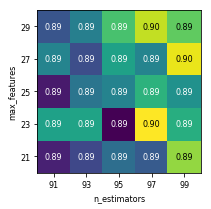

In [20]:
# 2.3 answer

from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

param_grid = {'n_estimators': [91, 93, 95, 97, 99], 'max_features': [21, 23, 25, 27, 29]}
random_search = RandomizedSearchCV(RandomForestClassifier(n_jobs=-1), param_distributions=param_grid, n_iter=25, cv=5, random_state=2)
X_train, X_test, y_train, y_test = train_test_split(
        X, y, stratify=y, random_state=0)
random_search.fit(X_train, y_train)

print("Test set score: {:.2f}".format(random_search.score(X_test, y_test)))
print("Best parameters: {}".format(random_search.best_params_))
print("Best cross-validation score: {:.2f}".format(random_search.best_score_))

'''

1. Best parameters combination given: n_estimator=100 (20 tree interval), and max_features='log2'. 
This means, unsurprisingly, that the more trees are included in the forest, the better the performance of that forest will be
2. A new grid was entered, only containing high values (80, 90, 100)
This new grid showed the best score at 90
3. New grid was created: [85, 90, 95, 100]. This grid returned 95 as best number of trees.
4. Finally, the following array was created: [92, 94, 95, 96, 98]. This yielded 98 trees
5. array [91-99] is final test, 96 trees to be created

1. Max_features was initially tested with the sqrt(1025), log2(1025) and 1025. log2(1025)=10 features scored best.
This means that optimal amount of features lies at least below sqrt(1025)=32 features. 
More specifically, the next run should contain param_grid = 'max_features': [<32-(32-10)=20]
2. It is chosen to use the following grid: [1, 5, 10, 15, 20]
This new grid selects max_features=20. This may indicate that the optimal value for max features lies in the range 15-20
3. A new grid is created for max_features: [15, 17, 19, 20, 21, 23, 25] This emphasizes the values around 20
This function returned 25 as the max_features.
4. Finally, the following array was created: [23, 24, 25, 26, 27, 28, 29, 30, 31]
This function returned 23 as max_features
5. array [21-29] is final test, 24 features to be included 

Best cross-validation score found is 0.90, while the test set score is valued 0.91. 
This means that cross-validation (mean of tests) reduces accuracy of the model only slightly, 
while increasing the generalisability the model. 

Unsurprisingly, RandomForests favor large amount of trees. However, not the maximum possible tree is selected (usually 100),
but a few below (97). Max_features is limited to 20 to 30. 
Multiple iteration, as described above in 1 to 4, have shown that these ranges are consistently picked. 
However, it seems that mulitple optima exist (see heatmap). 
This may mean that even this result is not accurate, despite the many iterations. 
''' 

results = pd.DataFrame(random_search.cv_results_)
scores = np.array(results.mean_test_score).reshape(5, 5)
# plot the mean cross-validation scores
mglearn.tools.heatmap(scores, xlabel='n_estimators', xticklabels=param_grid['n_estimators'],
                      ylabel='max_features', yticklabels=param_grid['max_features'], cmap="viridis");
                      


## 3. Understanding Ensembles (5 points (3+2))
Do a deeper analysis of how RandomForests and Gradient Boosting reduce their prediction error. We'll use the MAGIC telescope dataset (http://www.openml.org/d/1120). When high-energy particles hit the atmosphere, they produce chain reactions of other particles called 'showers', and you need to detect whether these are caused by gamma rays or cosmic rays.

In [9]:
# Get the data
magic_data = oml.datasets.get_dataset(1120) # Download MAGIC Telescope data
X, y = magic_data.get_data(target=magic_data.default_target_attribute);

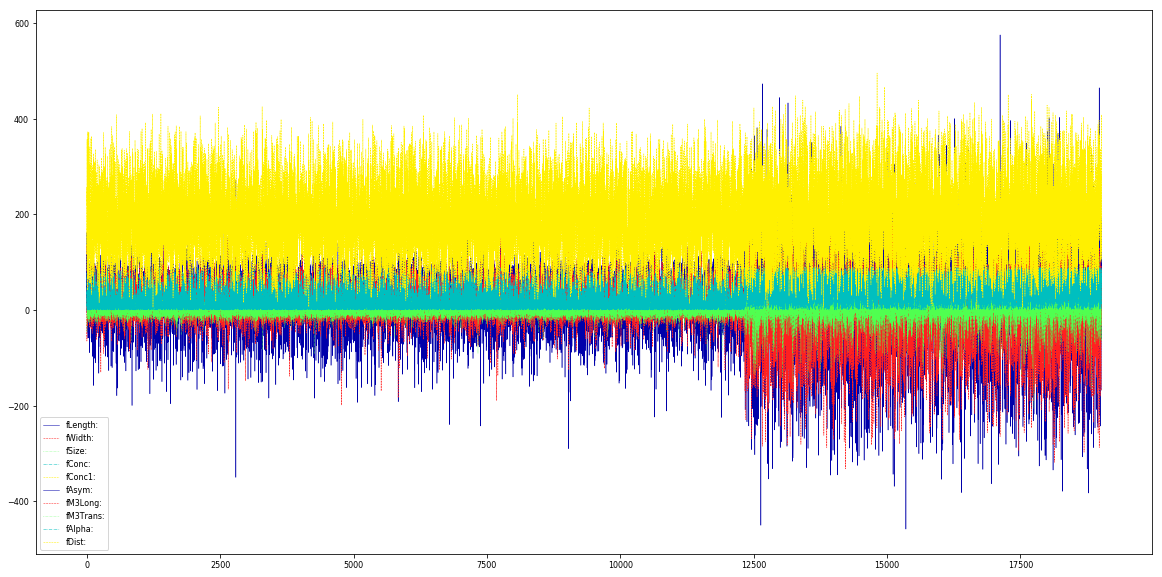

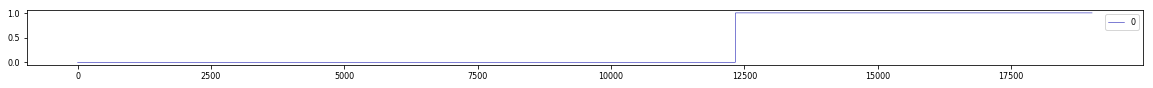

In [10]:
# Quick visualization
X, y, attribute_names = magic_data.get_data(target=magic_data.default_target_attribute, return_attribute_names=True)
magic = pd.DataFrame(X, columns=attribute_names)
magic.plot(figsize=(20,10))
# Also plot the target: 1 = gamma, 0 = background
pd.DataFrame(y).plot(figsize=(20,1));

1 . Do a bias-variance analysis of both algorithms. For each, vary the number of trees on a log scale from 1 to 1024, and plot the bias error (squared), variance, and total error (in one plot per algorithm). Interpret the results. Which error is highest for small ensembles, and which reduced most by each algorithm as you use a larger ensemble? When are both algorithms under- or overfitting? Provide a detailed explanation of why random forests and gradient boosting behave this way.
- See lecture 3 for an example on how to do the bias-variance decomposition
- To save time, you can use a 10% stratified subsample in your initial experiments, but show the plots for the full dataset in your report.

2 . A _validation curve_ can help you understand when a model starts under- or overfitting. It plots both training and test set error as you change certain characteristics of your model, e.g. one or more hyperparameters. Build validation curves for gradient boosting, evaluated using AUROC, by varying the number of iterations between 1 and 500. In addition, use at least two values for the learning rate (e.g. 0.1 and 1), and tree depth (e.g. 1 and 4). This will yield at least 4 curves. Interpret the results and provide a clear explanation for the results. When is the model over- or underfitting? Discuss the effect of the different combinations learning rate and tree depth and provide a clear explanation.
- While scikit-learn has a `validation_curve` function, we'll use a modified version (below) that provides a lot more detail and can be used to study more than one hyperparameter. You can use a default train-test split.

In [11]:
# Plots validation curves for every classifier in clfs. 
# Also indicates the optimal result by a vertical line
# Uses 1-AUROC, so lower is better
def validation_curve(clfs, X_test, y_test, X_train, y_train):
    for n,clf in enumerate(clfs):
        test_score = np.empty(len(clf.estimators_))
        train_score = np.empty(len(clf.estimators_))

        for i, pred in enumerate(clf.staged_decision_function(X_test)):
            test_score[i] = 1-roc_auc_score(y_test, pred)

        for i, pred in enumerate(clf.staged_decision_function(X_train)):
            train_score[i] = 1-roc_auc_score(y_train, pred)

        best_iter = np.argmin(test_score)
        learn = clf.get_params()['learning_rate']
        depth = clf.get_params()['max_depth']
        test_line = plt.plot(test_score,
                             label='learn=%.1f depth=%i (%.2f)'%(learn,depth,
                                                                 test_score[best_iter]))

        colour = test_line[-1].get_color()
        plt.plot(train_score, '--', color=colour)
        
        plt.xlabel("Number of boosting iterations")
        plt.ylabel("1 - area under ROC")
        plt.axvline(x=best_iter, color=colour)
        
    plt.legend(loc='best')